In [115]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
from tensorflow.keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

#from mnist import mnist_load_data
#(Xtrain, ytrain), (Xtest, ytest) = mnist_load_data()
#may be the naming conventions is different But I am using this Xtrain

print('train: ', Xtrain.shape)
print('Test: ', Xtest.shape)

train:  (60000, 28, 28)
Test:  (10000, 28, 28)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

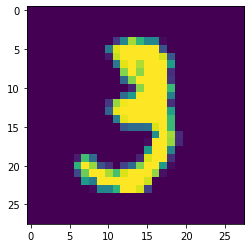

In [117]:
#here wer are defining the linewith to print our matrix form
np.set_printoptions(threshold=np.inf, linewidth=280)
print(Xtrain[10])
plt.imshow(Xtrain[10])

In [118]:
# converting values to in between 0 and 1
# where is 0 is black and 1 is white colour
Xtrain, Xtest = Xtrain / 255, Xtest / 255 

In [122]:
# Define the Dense Neural Network Model
# Here input shape is defined for universal 28 by 28 in Flattern form
# so that the matrix is going to converted in column matrix form.
# the dense model here define that the fully connected model which is
# one neuran will take input from each and every inputs model
# the while the input will be calculated with linear function in neurons after 
# this will be calculated further with non-linear function i.e relu
# our last layer will be of 10 class as per our classification class
# so our this 10 class will be connected with 256 previous dense neuron and this 256 neuron
# are connected with 784 inputs
# over all 28*28 = 784 inputs (0-255)--> 256 neurons(hidden layers) (0-9)--> 10 outputs

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [123]:
# here our optimizer is adam
# we defined our loss as sparse_categorical_cressentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [124]:
history = model.fit(Xtrain,ytrain,epochs=10)
# lets define this in histroy for our further ploting and analysis model

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2263 - accuracy: 0.9336
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0938 - accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0615 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0447 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0331 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0251 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0169 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.011

Text(0, 0.5, 'loss')

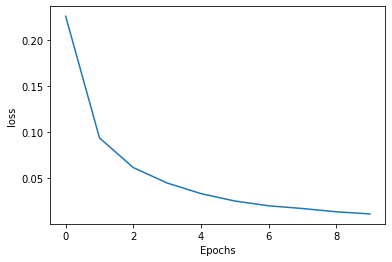

In [136]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

In [ ]:
# from the graph it is shown that it is getting progress at the end. which means
# if we could increase the epochs it will get more better results

In [127]:
DNN = model.evaluate(Xtest,ytest)
print(DNN)

313/313 [==============================] - 0s 899us/step - loss: 0.0733 - accuracy: 0.9808
[0.07329941540956497, 0.9807999730110168]


# CNN

In [164]:
# Load the Data and Reshape it
# we are taking it as float 32 here 
# and make the data normalizaion
# Next, we need to break the data down so that the neural network can digest it easier.**
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
input_shape = (28, 28, 1)
Xtrain = Xtrain.reshape(Xtrain.shape[0],28, 28, 1)
Xtest = Xtest.reshape(Xtest.shape[0],28,28,1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
Xtrain, Xtest = Xtrain / 255, Xtest / 255

we convert the y values (numbers) into ones and zeros, making each number categorical. This is called one-hot encoding. Without it, the neural network might categorize numbers based on how they are related numerically rather than how they look. To learn more about one-hot encoding,

In [129]:
ytrain = tf.keras.utils.to_categorical(ytrain,10)
ytest = tf.keras.utils.to_categorical(ytest,10)

In [130]:
# now lets build the neural network. Here the layer are in different types of neuron.
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation=tf.nn.relu,
                                  input_shape=input_shape),
        tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu ),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

Next, we need to train the model with the help of optimizer, number of epochs, or batch size. Depending on how fast the CPU is, this model can take some time to train.

In [132]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history_cnn = model2.fit(Xtrain,ytrain,
           batch_size=128,
           epochs=10, 
           validation_data=(Xtest,ytest))

Epoch 1/10
469/469 [==============================] - 41s 87ms/step - loss: 0.2381 - accuracy: 0.9275 - val_loss: 0.0517 - val_accuracy: 0.9824
Epoch 2/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0857 - accuracy: 0.9748 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 3/10
469/469 [==============================] - 44s 93ms/step - loss: 0.0639 - accuracy: 0.9812 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 4/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.0346 - val_accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0311 - val_accuracy: 0.9906
Epoch 6/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0273 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0261 - val_accuracy:

In [133]:
cnn = model2.evaluate(Xtest,ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.0273 - accuracy: 0.9922


In [134]:
print(cnn)

[0.02732304111123085, 0.9922000169754028]


Text(0, 0.5, 'loss')

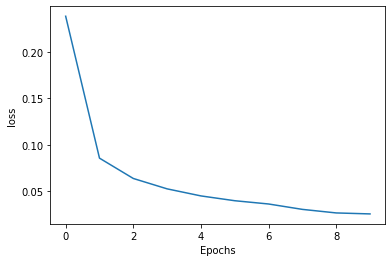

In [137]:
plt.plot(history_cnn.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

# Sigmoid 

In [149]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [156]:
Xtrain = Xtrain/255
Xtest = Xtest/255
Xtrain_flattened = Xtrain.reshape(len(Xtrain),28*28)
Xtest_flattened = Xtest.reshape(len(Xtest),28*28)

In [157]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [159]:

print('train: ', Xtrain_flattened.shape)
print('Test: ', Xtest_flattened.shape)

train:  (60000, 784)
Test:  (10000, 784)


In [161]:

history3 = model3.fit(Xtrain_flattened,ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 876us/step - loss: 0.2630 - accuracy: 0.9278
Epoch 2/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.2589 - accuracy: 0.9279
Epoch 3/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.2555 - accuracy: 0.9294
Epoch 4/10
1875/1875 [==============================] - 2s 865us/step - loss: 0.2531 - accuracy: 0.9304
Epoch 5/10
1875/1875 [==============================] - 2s 862us/step - loss: 0.2505 - accuracy: 0.9309
Epoch 6/10
1875/1875 [==============================] - 2s 865us/step - loss: 0.2483 - accuracy: 0.9312
Epoch 7/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.2467 - accuracy: 0.9321
Epoch 8/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.2449 - accuracy: 0.9332
Epoch 9/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.2435 - accuracy: 0.9328
Epoch 10/10
1875/1875 [==============================] - 2s 870u

In [162]:
LNN = model3.evaluate(Xtest_flattened,ytest)

313/313 [==============================] - 0s 754us/step - loss: 0.2616 - accuracy: 0.9283


Text(0, 0.5, 'Loss')

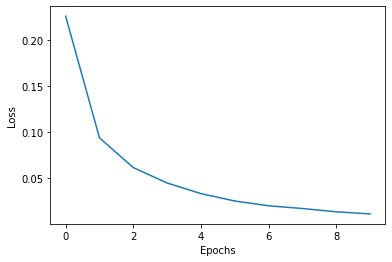

In [163]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [189]:
algo ={'cnn':cnn,'LNN':LNN,'DNN':DNN}

In [190]:
loss = [cnn[0],LNN[0],DNN[0]]

In [191]:
name = [key for key in algo]

In [192]:
acc = [cnn[1],LNN[1],DNN[1]]

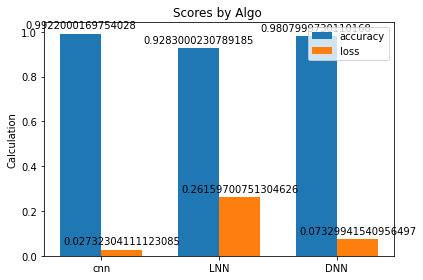

In [193]:
labels = name
accuracy = acc
loss = loss

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='accuracy')
rects2 = ax.bar(x + width/2, loss, width, label='loss')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Calculation')
ax.set_title('Scores by Algo ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
